<a href="https://colab.research.google.com/github/ProgramasParaFisicaDeParticulas/blindsampleanalysiswithcsv6-Kemish12/blob/main/Proyecto_Delf%C3%ADn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== Análisis de datos ===
Total de filas en el CSV: 20,000

Primeras 5 filas:
      Run     Event type1       E1     px1     py1      pz1     pt1    eta1  \
0  165617  75100943     G   6.2039 -4.2666  0.4565  -4.4793  4.2910 -0.9121   
1  165617  75587682     G  19.2892 -4.2121 -0.6516  18.8121  4.2622  2.1905   
2  165617  75167029     G   9.7583  2.3903 -3.7824   8.6715  4.4744  1.4156   
3  165617  75281957     G   9.6365  1.6516 -5.4313   7.7862  5.6769  1.1213   
4  165617  75393376     G   6.0112  3.3614  2.8883   4.0598  4.4318  0.8208   

     phi1  Q1 type2       E2     px2     py2      pz2     pt2    eta2    phi2  \
0  3.0350  -1     G   9.6690  7.2740 -2.8211  -5.7104  7.8019 -0.6786 -0.3700   
1 -2.9881  -1     G   9.8244  4.3439 -0.4735   8.7985  4.3697  1.4497 -0.1086   
2 -1.0072  -1     G  13.5684 -3.3975  5.1910  12.0665  6.2039  1.4187  2.1503   
3 -1.2756   1     G   7.0263 -1.6449  4.4418   5.1887  4.7366  0.9473  1.9255   
4  0.7098  -1     G   7.7557 -5.0416 -3.01

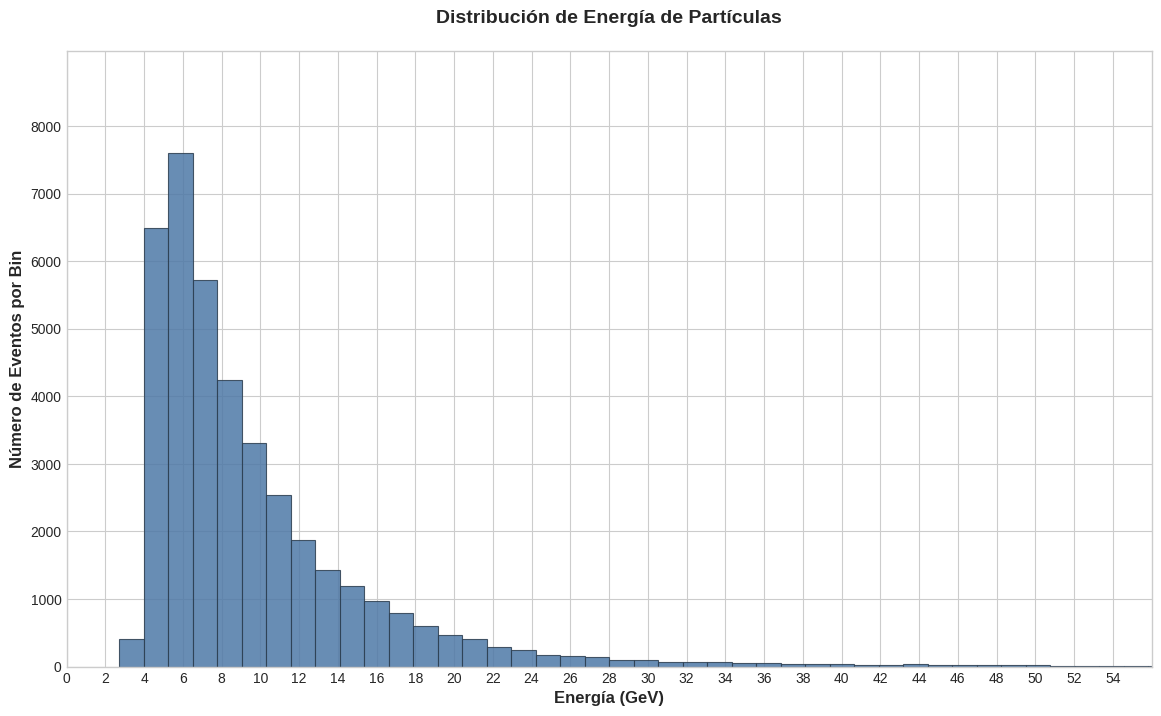

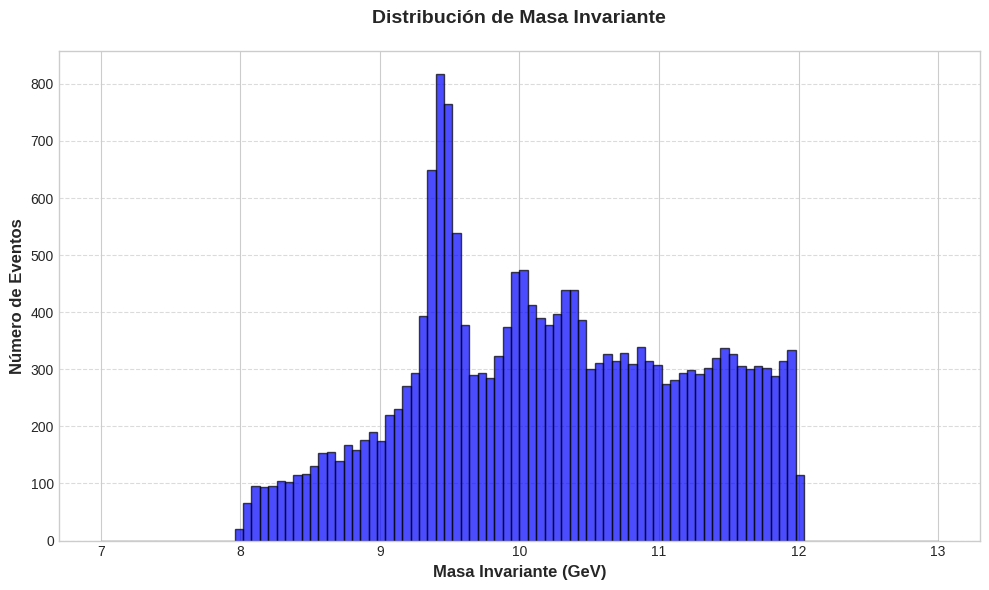

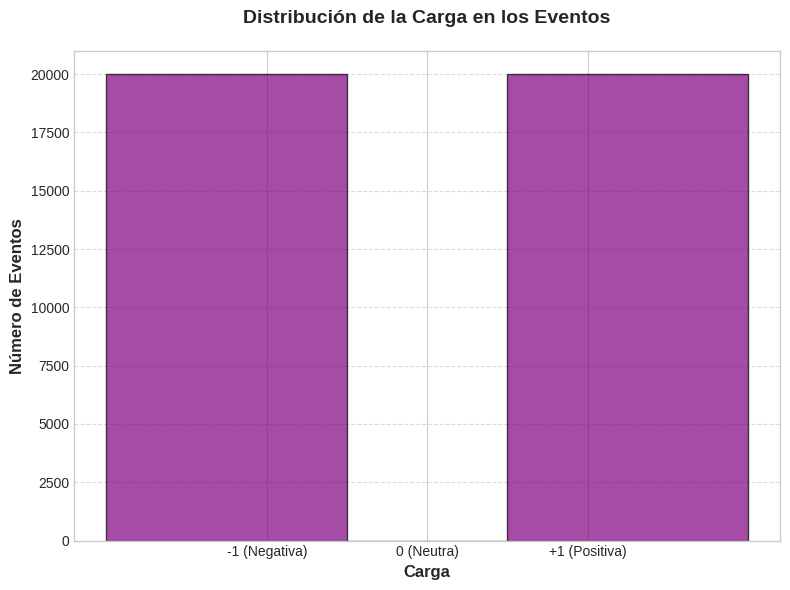


=== Distribución de la carga ===
Eventos con carga negativa (-1): 20,000
Eventos con carga neutra (0): 0
Eventos con carga positiva (+1): 20,000

Valores únicos en 'carga1':
[-1  1]

Valores únicos en 'carga2':
[ 1 -1]


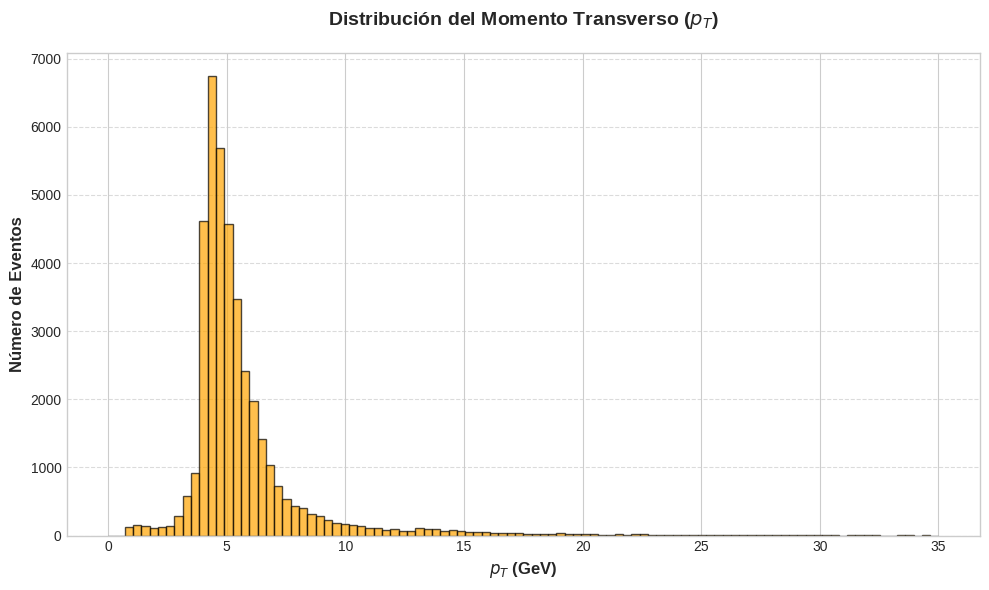


=== Estadísticas de $p_T$ ===
Valores mínimos de $p_T$: 0.71 GeV
Valores máximos de $p_T$: 140.53 GeV
Número total de eventos : 40,000


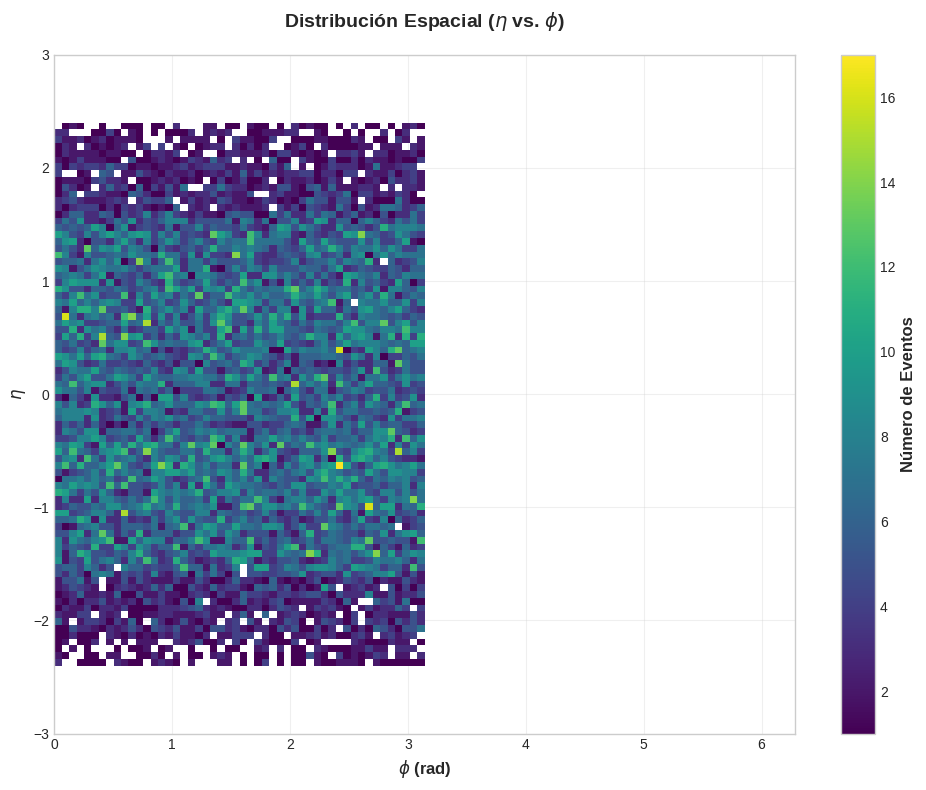


=== Estadísticas de eta y phi ===
Valores mínimos de eta: -2.40
Valores máximos de eta: 2.40
Valores mínimos de phi: -3.14
Valores máximos de phi: 3.14


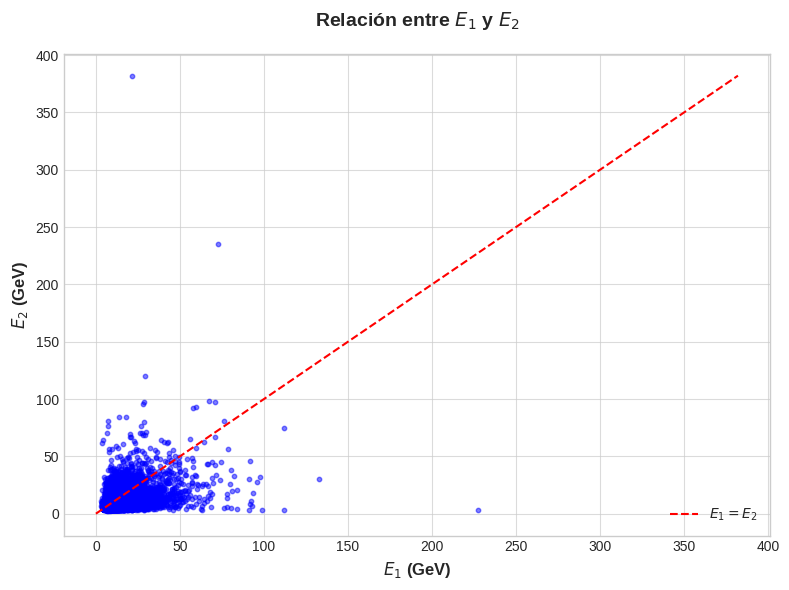


=== Estadísticas de E1 y E2 ===
Energía mínima de E1: 2.87 GeV
Energía máxima de E1: 227.21 GeV
Energía mínima de E2: 2.73 GeV
Energía máxima de E2: 382.03 GeV


/tmp/ipython-input-11-555640076.py:383: UserWarning: Glyph 978 (\N{GREEK UPSILON WITH HOOK SYMBOL}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 978 (\N{GREEK UPSILON WITH HOOK SYMBOL}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


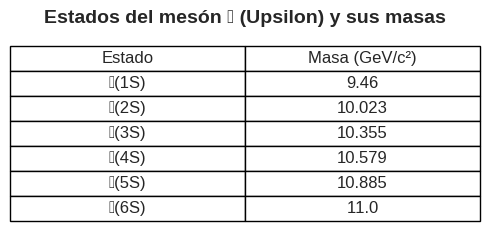

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files



# 1. Cargar los datos con verificación
url = "https://raw.githubusercontent.com/ProgramasParaFisicaDeParticulas/blindsampleanalysiswithcsv6-Kemish12/main/Sample6.csv"
datos = pd.read_csv(url)

# 2. Análisis detallado de los datos
print("=== Análisis de datos ===")
print(f"Total de filas en el CSV: {len(datos):,}")
print("\nPrimeras 5 filas:")
print(datos.head())
print("\nResumen estadístico E1 y E2:")
print(datos[['E1', 'E2']].describe())

# 3. Combinación robusta de energías
def combinar_energias(df):
    # Filtrar filas donde E1 y E2 tienen valores válidos
    df_filtrado = df.dropna(subset=['E1', 'E2'])

    # Crear una nueva lista con todas las energías
    energias_combinadas = pd.concat([df_filtrado['E1'], df_filtrado['E2']])

    print("\n=== Estadísticas combinadas ===")
    print(f"Eventos originales: {len(df):,}")
    print(f"Eventos después de filtrar NaN: {len(df_filtrado):,}")
    print(f"Energía mínima: {energias_combinadas.min():.2f} GeV")
    print(f"Energía máxima: {energias_combinadas.max():.2f} GeV")

    return energias_combinadas.values

try:
    todas_energias = combinar_energias(datos)
except ValueError as e:
    print(f"\nError: {e}")
    exit()

# Filtrar filas donde E1 y E2 tienen valores válidos
df_filtrado = datos.dropna(subset=['E1', 'E2'])

print("\n=== Datos filtrados ===")
print(f"Eventos originales: {len(datos):,}")
print(f"Eventos después de filtrar NaN: {len(df_filtrado):,}")

# 4. Configuración del histograma
plt.figure(figsize=(14, 8))
plt.style.use('seaborn-v0_8-whitegrid')

# Crear histograma sin restricción de rango
counts, bins, patches = plt.hist(
    todas_energias,
    bins=300,
    color='#4e79a7',
    edgecolor='#2c3e50',
    alpha=0.85,
    linewidth=0.8
)

# 5. Ajustar ejes para mostrar densidad de datos
max_count = counts.max()
y_max = max(8000, max_count * 1.2)  # Asegurar visibilidad
x_max = max(56, 56)
plt.ylim(0,y_max)
plt.xlim(0,x_max)
plt.xticks(np.arange(0, 56, 2), fontsize=10)
plt.yticks(np.arange(0, 9000, 1000), fontsize=10)

# 6. Etiquetas y título mejorados
plt.xlabel('Energía (GeV)', fontsize=12, fontweight='bold')
plt.ylabel('Número de Eventos por Bin', fontsize=12, fontweight='bold')
plt.title(
    f'Distribución de Energía de Partículas',
    fontsize=14,
    pad=20,
    fontweight='bold'
)

#plt.savefig('eventos vs energía.png', dpi=300, bbox_inches='tight')
#files.download('eventos vs energía.png')


# 9. Verificación adicional
print("\n=== Verificación final ===")
print(f"Suma de todos los conteos en bins: {int(counts.sum()):,}")
print(f"Esto DEBE coincidir con: {len(todas_energias):,}")

# 2. Calcular la masa invariante para cada evento
def calcular_masa_invariante(df):
    # Extraer las columnas necesarias
    E1 = df['E1']
    E2 = df['E2']
    px1 = df['px1']
    py1 = df['py1']
    pz1 = df['pz1']
    px2 = df['px2']
    py2 = df['py2']
    pz2 = df['pz2']

    # Calcular la masa invariante
    energia_total = E1 + E2
    momento_total_x = px1 + px2
    momento_total_y = py1 + py2
    momento_total_z = pz1 + pz2
    momento_total_cuadrado = momento_total_x**2 + momento_total_y**2 + momento_total_z**2

    masa_invariante = np.sqrt(energia_total**2 - momento_total_cuadrado)
    return masa_invariante

# Aplicar la función para calcular la masa invariante
datos['MasaInvariante'] = calcular_masa_invariante(datos)

# 3. Crear el histograma de la masa invariante
plt.figure(figsize=(10, 6))
plt.style.use('seaborn-v0_8-whitegrid')

# Histograma de la masa invariante
plt.hist(
    datos['MasaInvariante'],
    bins=100,
    range=(7, 13),  # Rango típico para observar el bosón Z (~91 GeV)
    color='blue',
    alpha=0.7,
    edgecolor='black'
)

# Etiquetas y título
plt.xlabel('Masa Invariante (GeV)', fontsize=12, fontweight='bold')
plt.ylabel('Número de Eventos', fontsize=12, fontweight='bold')
plt.title('Distribución de Masa Invariante', fontsize=14, pad=20, fontweight='bold')


# Mejoras visuales
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar la gráfica
#plt.savefig('eventos vs masa invariante.png', dpi=300, bbox_inches='tight')
#files.download('eventos vs masa invariante.png')
#plt.show()

# Contar el número total de eventos en el histograma
conteo_total_histograma = np.sum(counts)
print(f"Eventos totales en el histograma: {int(conteo_total_histograma):,}")
print(f"Esto DEBE coincidir con: {len(datos):,}")

# 2. Verificar si hay columnas de carga
if 'Q1' not in datos.columns or 'Q2' not in datos.columns:
    raise ValueError("El archivo CSV debe contener columnas 'Q1' y 'Q2'.")

eventos_dos_positivas = datos[(datos['Q1'] > 0) & (datos['Q2'] > 0)]
eventos_dos_negativas = datos[(datos['Q1'] < 0) & (datos['Q2'] < 0)]

# 3. Mostrar los resultados
print("\n=== Eventos con Dos Cargas Positivas ===")
print(f"Número de eventos con dos cargas positivas: {len(eventos_dos_positivas)}")
if len(eventos_dos_positivas) > 0:
    print(eventos_dos_positivas[['Q1', 'Q2']])

print("\n=== Eventos con Dos Cargas Negativas ===")
print(f"Número de eventos con dos cargas negativas: {len(eventos_dos_negativas)}")
if len(eventos_dos_negativas) > 0:
    print(eventos_dos_negativas[['Q1', 'Q2']])

# Combinar las cargas de ambas partículas
cargas_combinadas = pd.concat([datos['Q1'], datos['Q2']])

# 3. Crear el histograma de la distribución de la carga
plt.figure(figsize=(8, 6))
plt.style.use('seaborn-v0_8-whitegrid')

# Histograma de la carga
counts, bins, patches = plt.hist(
    cargas_combinadas,
    bins=[-2, -0.5, 0, 0.5, 2],  # Bins para cargas -1, 0, +1
    color='purple',
    alpha=0.7,
    edgecolor='black'
)

# Etiquetas y título
plt.xlabel('Carga', fontsize=12, fontweight='bold')
plt.ylabel('Número de Eventos', fontsize=12, fontweight='bold')
plt.title('Distribución de la Carga en los Eventos', fontsize=14, pad=20, fontweight='bold')

# Personalizar las etiquetas del eje x
plt.xticks([-1, 0, 1], ['-1 (Negativa)', '0 (Neutra)', '+1 (Positiva)'], fontsize=10)

# Mejoras visuales
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar la gráfica
#plt.savefig('distribución cargas.png', dpi=300, bbox_inches='tight')
#files.download('distribución cargas.png')
plt.show()


# 4. Verificación adicional
print("\n=== Distribución de la carga ===")
print(f"Eventos con carga negativa (-1): {len(cargas_combinadas[cargas_combinadas == -1]):,}")
print(f"Eventos con carga neutra (0): {len(cargas_combinadas[cargas_combinadas == 0]):,}")
print(f"Eventos con carga positiva (+1): {len(cargas_combinadas[cargas_combinadas == 1]):,}")

print("\nValores únicos en 'carga1':")
print(datos['Q1'].unique())

print("\nValores únicos en 'carga2':")
print(datos['Q2'].unique())

# Verificar si las columnas de pT están presentes
if 'pt1' not in datos.columns or 'pt2' not in datos.columns:
    raise ValueError("El archivo CSV debe contener columnas 'pt1' y 'pt2'.")

# Combinar los valores de pT de ambas partículas
pT_combinado = pd.concat([datos['pt1'], datos['pt2']])


# 2. Crear el histograma de la distribución de pT
plt.figure(figsize=(10, 6))
plt.style.use('seaborn-v0_8-whitegrid')

# Histograma del momento transverso
counts, bins, patches = plt.hist(
    pT_combinado,
    bins=100,  # Número de bins
    range=(0, 35),  # Rango típico para pT en GeV
    color='orange',
    alpha=0.7,
    edgecolor='black'
)

# Etiquetas y título
plt.xlabel('$p_T$ (GeV)', fontsize=12, fontweight='bold')
plt.ylabel('Número de Eventos', fontsize=12, fontweight='bold')
plt.title('Distribución del Momento Transverso ($p_T$)', fontsize=14, pad=20, fontweight='bold')

# Mejoras visuales
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar la gráfica
#plt.savefig('eventos vs pt.png', dpi=300, bbox_inches='tight')
#files.download('eventos vs pt.png')
plt.show()

# 3. Verificación adicional
print("\n=== Estadísticas de $p_T$ ===")
print(f"Valores mínimos de $p_T$: {pT_combinado.min():.2f} GeV")
print(f"Valores máximos de $p_T$: {pT_combinado.max():.2f} GeV")
print(f"Número total de eventos : {len(pT_combinado):,}")

# Verificar si las columnas eta y phi están presentes
if 'eta1' not in datos.columns or 'phi1' not in datos.columns:
    raise ValueError("El archivo CSV debe contener columnas 'eta1' y 'phi1'.")

# Combinar los valores de eta y phi de ambas partículas
eta_combinado = pd.concat([datos['eta1'], datos['eta2']])
phi_combinado = pd.concat([datos['phi1'], datos['phi2']])


# 2. Crear el histograma 2D de eta vs phi
plt.figure(figsize=(10, 8))
plt.style.use('seaborn-v0_8-whitegrid')

# Histograma 2D
hist = plt.hist2d(
    phi_combinado,  # Eje x: phi
    eta_combinado,  # Eje y: eta
    bins=[100, 100],  # Número de bins en x e y
    range=[[0, 2 * np.pi], [-3, 3]],  # Rango típico para phi (0-2π) y eta (-5 a 5)
    cmap='viridis',  # Mapa de colores
    cmin=1  # Solo mostrar bins con al menos 1 evento
)

# Etiquetas y título
plt.xlabel('$\phi$ (rad)', fontsize=12, fontweight='bold')
plt.ylabel('$\eta$', fontsize=12, fontweight='bold')
plt.title('Distribución Espacial ($\eta$ vs. $\phi$)', fontsize=14, pad=20, fontweight='bold')

# Barra de color
cbar = plt.colorbar(hist[3], ax=plt.gca())
cbar.set_label('Número de Eventos', fontsize=12, fontweight='bold')

# Mejoras visuales
plt.grid(alpha=0.3)
plt.tight_layout()

# Mostrar la gráfica
#plt.savefig('eta vs phi.png', dpi=300, bbox_inches='tight')
#files.download('eta vs phi.png')
plt.show()

# 3. Verificación adicional
print("\n=== Estadísticas de eta y phi ===")
print(f"Valores mínimos de eta: {eta_combinado.min():.2f}")
print(f"Valores máximos de eta: {eta_combinado.max():.2f}")
print(f"Valores mínimos de phi: {phi_combinado.min():.2f}")
print(f"Valores máximos de phi: {phi_combinado.max():.2f}")

# Verificar si las columnas E1 y E2 están presentes
if 'E1' not in datos.columns or 'E2' not in datos.columns:
    raise ValueError("El archivo CSV debe contener columnas 'E1' y 'E2'.")

# Extraer las energías sin filtrar
E1 = datos['E1']
E2 = datos['E2']

# 2. Crear el diagrama de dispersión
plt.figure(figsize=(8, 6))
plt.style.use('seaborn-v0_8-whitegrid')

# Scatter plot
plt.scatter(
    E1,  # Eje x: Energía de la partícula 1
    E2,  # Eje y: Energía de la partícula 2
    alpha=0.5,  # Transparencia para mejorar la visualización
    s=10,  # Tamaño de los puntos
    color='blue'
)

# Etiquetas y título
plt.xlabel('$E_1$ (GeV)', fontsize=12, fontweight='bold')
plt.ylabel('$E_2$ (GeV)', fontsize=12, fontweight='bold')
plt.title('Relación entre $E_1$ y $E_2$', fontsize=14, pad=20, fontweight='bold')

# Línea diagonal para referencia (E1 = E2)
max_energy = max(E1.max(), E2.max())
plt.plot([0, max_energy], [0, max_energy], color='red', linestyle='--', linewidth=1.5, label='$E_1 = E_2$')
plt.legend(fontsize=10)

# Mejoras visuales
plt.grid(alpha=0.7)
plt.tight_layout()

# Mostrar la gráfica
#plt.savefig('E2 vs E1.png', dpi=300, bbox_inches='tight')
#files.download('E2 vs E1.png')
plt.show()

# 3. Verificación adicional
print("\n=== Estadísticas de E1 y E2 ===")
print(f"Energía mínima de E1: {E1.min():.2f} GeV")
print(f"Energía máxima de E1: {E1.max():.2f} GeV")
print(f"Energía mínima de E2: {E2.min():.2f} GeV")
print(f"Energía máxima de E2: {E2.max():.2f} GeV")



